In [1]:
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('autism_screening.csv')
data = data.drop("relation", axis=1)
data = data.drop("age_desc", axis=1)
data = data.drop("used_app_before", axis=1)
data = data.drop("ethnicity", axis = 1)
data = data.drop("contry_of_res", axis = 1)
data = data.drop("austim", axis = 1)
data = data.drop("result", axis = 1)
data = data.drop("gender", axis = 1)
data = data.drop("age", axis = 1)
factor_dict = {"Class/ASD" : {"NO": 0, "YES": 1}, "jundice" : {"no" : 0, "yes" : 1}}
data.replace(factor_dict, inplace = True)
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,jundice,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0
2,1,1,0,1,1,0,1,1,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0,1
700,1,0,0,0,0,0,0,1,0,1,0,0
701,1,0,1,1,1,0,1,1,0,1,0,1
702,1,0,0,1,1,0,1,0,1,1,0,0


In [3]:
data.shape

(704, 12)

In [4]:
data.groupby('Class/ASD').size()

Class/ASD
0    515
1    189
dtype: int64

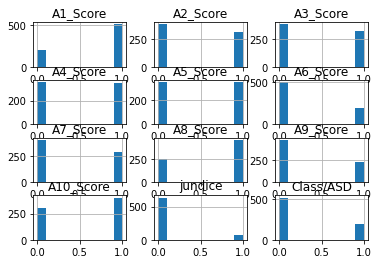

In [5]:
data.hist()
plt.show()

In [6]:
validation_size=0.20
seed=7
array = data.values
X = array[:,0:10]
Y = array[:,11]
Y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [7]:
X_train , X_validation, Y_train, Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [8]:
X_train.shape

(563, 10)

In [9]:
X_validation.shape

(141, 10)

In [10]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lgr=linear_model.LogisticRegression()

In [11]:
lgr.fit(X_train, Y_train)

LogisticRegression()

In [12]:
predictions=lgr.predict(X_validation)
accuracy_score(Y_validation,predictions)

1.0

In [13]:
confusion_matrix(Y_validation,predictions)

array([[97,  0],
       [ 0, 44]])

In [14]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
predictions=dt.predict(X_validation)
accuracy_score(Y_validation,predictions)

0.9361702127659575

In [16]:
confusion_matrix(Y_validation,predictions)

array([[91,  6],
       [ 3, 41]])

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
predictions=gnb.predict(X_validation)
accuracy_score(Y_validation,predictions)

0.9787234042553191

In [18]:
confusion_matrix(Y_validation,predictions)

array([[96,  1],
       [ 2, 42]])

In [19]:
from sklearn import svm
vm=svm.SVC()
vm.fit(X_train,Y_train)
predictions=vm.predict(X_validation)
accuracy_score(Y_validation,predictions)

0.9858156028368794

In [20]:
confusion_matrix(Y_validation,predictions)

array([[97,  0],
       [ 2, 42]])

In [21]:
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [22]:
nn=Sequential()
nn.add(Dense(12,input_dim=10,activation='relu'))
nn.add(Dense(8,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))

In [23]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
nn.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
57/57 [==============================] - 0s 506us/step - loss: 0.6467 - accuracy: 0.6785
Epoch 2/150
57/57 [==============================] - 0s 528us/step - loss: 0.5371 - accuracy: 0.8597
Epoch 3/150
57/57 [==============================] - 0s 519us/step - loss: 0.4331 - accuracy: 0.8917
Epoch 4/150
57/57 [==============================] - 0s 504us/step - loss: 0.3534 - accuracy: 0.9005
Epoch 5/150
57/57 [==============================] - 0s 522us/step - loss: 0.2958 - accuracy: 0.9076
Epoch 6/150
57/57 [==============================] - 0s 523us/step - loss: 0.2509 - accuracy: 0.9218
Epoch 7/150
57/57 [==============================] - 0s 525us/step - loss: 0.2151 - accuracy: 0.9307
Epoch 8/150
57/57 [==============================] - 0s 537us/step - loss: 0.1869 - accuracy: 0.9378
Epoch 9/150
57/57 [==============================] - 0s 539us/step - loss: 0.1691 - accuracy: 0.9432
Epoch 10/150
57/57 [==============================] - 0s 511us/step - loss: 0.1501 - accura

In [25]:
predictions=nn.evaluate(X_validation,Y_validation)

5/5 [==============================] - 0s 638us/step - loss: 0.0064 - accuracy: 1.0000
